In [1]:
# this notebook is testing the TA lib as its being built from notes
# this TA lib will be a complete rewrite in python. By alphagriffin.

In [2]:
%matplotlib inline
import ag.bittensor.ai.make_data as make_data
import ag.bittensor.utils.talib as talib

In [3]:
def unzero(df):
    df = df.replace(0,'NaN')
    df = df.dropna(how='all',axis=0)
    df = df.replace('NaN', 0)
    df.len = len(df)
    return df

def check_df(df):
    for dtype in ['float','int','object']:
        selected_dtype = df.select_dtypes(include=[dtype])
        mean_usage_b = selected_dtype.memory_usage(deep=True).mean()
        mean_usage_mb = mean_usage_b / 1024 ** 2
        print("Average memory usage for {} columns: {:03.2f} MB".format(dtype,mean_usage_mb))

In [4]:
# Globals
datasmith = make_data.MakeData()
TA = talib.TALib()

Average memory usage for float columns: 0.00 MB
Average memory usage for int columns: 0.00 MB
Average memory usage for object columns: 0.00 MB
                         Open      High       Low     Close    Volume
timestamp                                                            
2018-03-01 08:23:00  0.000032  0.000032  0.000032  0.000032  394.0000
2018-03-01 08:24:00  0.000032  0.000032  0.000032  0.000032  402.4806


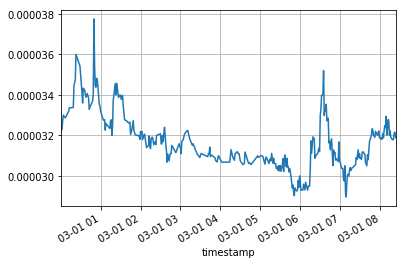

In [9]:
## MAKE CANDLES FIRST!
filename = datasmith.random_filename
datasmith.dataframe = filename
datasmith.candles = '45T'
df = datasmith.candles
check_df(df)
if True:
    print(df.tail(2))
    df['Close'].plot(grid=True)

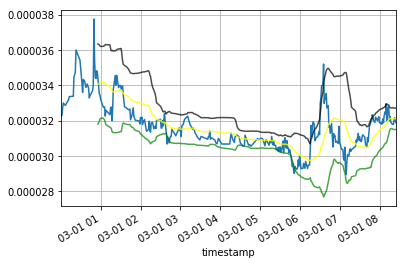

In [10]:
## FOR MEMORY ISSUES!!!
# TA WILL BE ISSUED AS ITS OWN pd.Series !!
# moving average
# df = df[:-250]
df['Close'].plot(grid=True)
if False:
    ma_close = TA.MA(df, 30)
    ma_vol = TA.MA(df, 30, 'baseVolume')
    # print(len(ma_close))
    # print(ma_close.tail(2))
    # ma_close.plot(grid=True, alpha=0.5)
# expontential moving average
if False:
    ema_close = TA.EMA(df, 30)
    ema_vol = TA.EMA(df, 30, 'baseVolume')
    # print(ema_close.tail(2))
    ema_close.plot(grid=True, alpha=0.4, color='red')
# momentum
if False:
    mom_close = TA.MOM(df, 30)
    mom_vol = TA.MOM(df, 30, 'baseVolume')
    # print(mom_close.tail(12))
    # mom_close.plot(grid=True, alpha=0.8)
# rate of change
if False:
    roc_close = TA.ROC(df, 30)
    roc_vol = TA.ROC(df, 30, 'baseVolume')
    # print(roc_close.tail(12))
    # roc_close.plot(grid=True, alpha=0.7)
# Average True Range
if False:
    atr_close = TA.ATR(df, 30)
    # need to make vol candles first!
    # atr_vol = TA.ATR(df, 30, 'baseVolume')
    atr_close.plot(grid=True, alpha=0.7)
# Bollinger Bands
if True:
    B1, MA, B2 = TA.BBANDS(df, 30)
    B1.plot(grid=True, alpha=0.7, color='black')
    MA.plot(grid=True, alpha=0.8, color='yellow')
    B2.plot(grid=True, alpha=0.7, color='green')
# Commodity Channel Index
if False:
    CCI = TA.CCI(df, 30)
    # print(CCI.tail(2))
    CCI.plot(grid=True)
#Relative Strength Index
if False:
    RSI = TA.RSI(df, 30)
    p = RSI.plot(grid=True)
    p.axhline(y=0.8, color='red')
    p.axhline(y=.3, color='green')
if True:
    pass

In [7]:
def unzero(df):
    """Necessary for any df rolling calculation."""
    df = df.replace(0,'NaN')
    df = df.dropna(how='all',axis=0)
    df = df.replace('NaN', 0)
    df.len = len(df)
    return df